Running for k =  1
Test set accuracy: 96.67%
----------------------------
Running for k =  2
Test set accuracy: 96.67%
----------------------------
Running for k =  3
Test set accuracy: 96.67%
----------------------------
Running for k =  4
Test set accuracy: 96.67%
----------------------------
Running for k =  5
Test set accuracy: 96.67%
----------------------------
Running for k =  6
Test set accuracy: 96.67%
----------------------------
Running for k =  7
Test set accuracy: 100.00%
----------------------------
Running for k =  8
Test set accuracy: 100.00%
----------------------------
Running for k =  9
Test set accuracy: 100.00%
----------------------------
Running for k =  10
Test set accuracy: 100.00%
----------------------------
Running for k =  11
Test set accuracy: 100.00%
----------------------------
Running for k =  12
Test set accuracy: 100.00%
----------------------------
Running for k =  13
Test set accuracy: 100.00%
----------------------------
Running for k =  14
Test se

'\nUključivanje ostalih featura povećava accuracy modela. \nZa k u intervalu 5-8 može ići i do 100%\n'

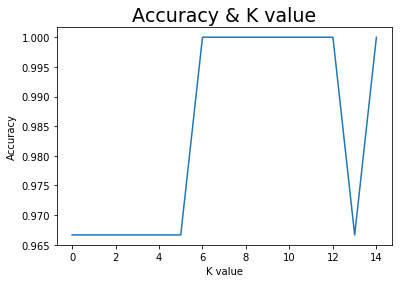

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


%matplotlib inline

class KNN:
  
  def __init__(self, nb_features, nb_classes, data, k):
    self.nb_features = nb_features
    self.nb_classes = nb_classes
    self.data = data
    self.k = k
    
    # X je feature matrica,Q je upit.
    self.X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
    self.Y = tf.placeholder(shape=(None), dtype=tf.int32)
    self.Q = tf.placeholder(shape=(nb_features), dtype=tf.float32)
    
    # Racunamo kvadriranu euklidsku udaljenost i uzimamo minimalnih k.
    dists = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X, self.Q)), axis=1))
    _, idxs = tf.nn.top_k(-dists, self.k)  
    
    self.classes = tf.gather(self.Y, idxs)
    self.dists = tf.gather(dists, idxs)
    
    self.w = tf.fill([k], 1/k)
    
    # Svaki red mnozimo svojim glasom i sabiramo glasove po kolonama.
    w_col = tf.reshape(self.w, (k, 1))
    self.classes_one_hot = tf.one_hot(self.classes, nb_classes)
    self.scores = tf.reduce_sum(w_col * self.classes_one_hot, axis=0)
    
    # Klasa sa najvise glasova je hipoteza.
    self.hyp = tf.argmax(self.scores)
    
  # Ako imamo odgovore za upit racunamo i accuracy.
  def predict(self, query_data):
    
    with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
     
      nb_queries = 30
      
      matches = 0
      for i in range(nb_queries):
        hyp_val = sess.run(self.hyp, feed_dict = {self.X: self.data['x'], 
                                                  self.Y: self.data['y'], 
                                                 self.Q: query_data['x'][i]})
        if query_data['y'] is not None:
          actual = query_data['y'][i]
          match = (int(hyp_val) == int(actual))
          if match:
            matches += 1
          
      accuracy = matches / nb_queries
      
      return accuracy
    

# Ucitavamo Iris data set.
filename = 'iris.csv'
data = dict()
# Uzimamo u obzir samo prva 2 featura
data['x'] = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(0, 1, 2, 3))
data['y'] = np.loadtxt(filename, dtype=str, delimiter=',', skiprows=1, usecols=4)

# Mešamo podatke jer su na početku poređani po klasama
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

i = 0
for x in data['y']:
  if x == 'Iris-setosa':
    data['y'][i]= 0
  elif x == 'Iris-versicolor':
    data['y'][i]= 1
  else:
    data['y'][i]= 2
  i += 1

# Delimo podatke na train i test 
split_point = int(nb_samples*0.8)

train_x = data['x'][:split_point]
train_y = data['y'][:split_point]

test_x = data['x'][split_point:]
test_y = data['y'][split_point:]

nb_train = len(train_y)
nb_test = len(test_y)

train_x = np.reshape(train_x, [nb_train, -1])
test_x = np.reshape(test_x, [nb_test, -1])

# Pokrecemo kNN na train skupu
train_data = {'x': train_x, 'y': train_y}
nb_features = 4
nb_classes = 3

accuracy_list = []

for k in range (1, 16):
  print("Running for k = ", k)
  knn = KNN(nb_features, nb_classes, train_data, k)
  # Pokrecemo kNN na test skupu
  accuracy = knn.predict({'x': test_x, 'y': test_y})
  accuracy_list.append(accuracy)
  print('Test set accuracy: {:.2f}%'.format(accuracy*100))
  print('----------------------------')
plt.show()

plt.title('Accuracy & K value', fontsize=19)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.plot(accuracy_list)

'''
Uključivanje ostalih featura povećava accuracy modela. 
Za k u intervalu 6-15 može ići i do 100%. Dešava se da za velike vrednosti k pogreši
'''